# Hello Keras - MNIST digits

MNIST dataset is considered a hello world of deep learning. It consists of hand written digits 0-9 with a goal to train a network to classify a correct label - digit written in the image.

I decided to pick a tensorflow+keras for my deep learning experimentations starting today, with this example.

First, let's import the dataset itself. As you can see from the output of the mnist.load_data(), it's downloaded from the online repository. It consists of 60000 images for training and 10000 for test purposes. Each image is 28x28 pixels.

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

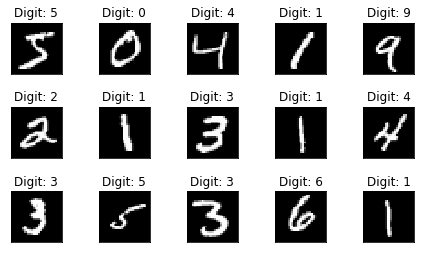

In [5]:
fig = plt.figure()
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

In [8]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

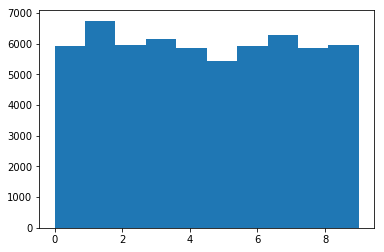

In [9]:
plt.hist(train_labels)

After we understand the data we are working with. Let's create a network!

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Data preparation is an important process, especially for neural networks. 

First, we reshape our 28 * 28 2D images into the 784 1D array in order to pass those images as an input for our network. Then, we'll reshape every grayscale pixel information (0-255) into the 0-1 range.

We'll also use to_categorical to convert class vector that represents our labels into the binary class matrix.

In [12]:
X_train = train_images.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = test_images.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [15]:
network.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2595 - acc: 0.9255
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.1053 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0691 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0504 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0382 - acc: 0.9886


In [16]:
test_loss, test_acc = network.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 0s 37us/step


0.9786